In [43]:
import os
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [44]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [45]:
training_set = train_generator.flow_from_directory('../input/stanford2/train',
target_size=(64,64),
batch_size=64,
class_mode='categorical')

Found 1232 images belonging to 10 classes.


In [46]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

testing_set = test_generator.flow_from_directory('../input/stanford2/test',
target_size=(64,64),
batch_size=64,
class_mode='categorical'
)

Found 520 images belonging to 10 classes.


In [47]:
train_classes = training_set.classes
train_labels = training_set.class_indices

In [71]:
test_classes = testing_set.classes
test_labels = testing_set.class_indices

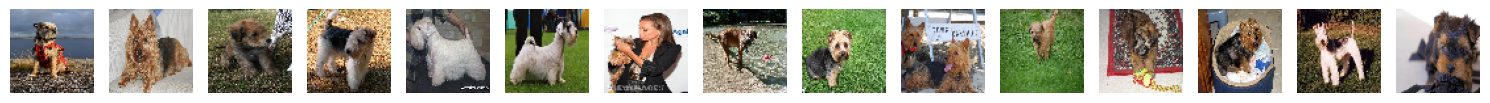

In [49]:
imgs, labels = next(testing_set)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 15, figsize=(15, 15))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)

In [50]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

testing_set = test_generator.flow_from_directory('../input/stanford2/test',
shuffle=False,
target_size=(64,64),
batch_size=64,
class_mode='categorical'
)

Found 520 images belonging to 10 classes.


In [51]:
#cnn.reset_states

In [52]:
cnn = tf.keras.models.Sequential()

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [54]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
fit_model = cnn.fit(x=training_set, validation_data=testing_set, epochs=20)

Epoch 1/20
20/20 [==============================] - 13s 573ms/step - loss: 2.3146 - accuracy: 0.1185 - val_loss: 2.2731 - val_accuracy: 0.2173
Epoch 2/20
20/20 [==============================] - 11s 534ms/step - loss: 2.1649 - accuracy: 0.2386 - val_loss: 2.0634 - val_accuracy: 0.2769
Epoch 3/20
20/20 [==============================] - 11s 536ms/step - loss: 1.9870 - accuracy: 0.2670 - val_loss: 1.9659 - val_accuracy: 0.2846
Epoch 4/20
20/20 [==============================] - 12s 602ms/step - loss: 1.8674 - accuracy: 0.3336 - val_loss: 1.9102 - val_accuracy: 0.3288
Epoch 5/20
20/20 [==============================] - 11s 540ms/step - loss: 1.7733 - accuracy: 0.3547 - val_loss: 1.8258 - val_accuracy: 0.3385
Epoch 6/20
20/20 [==============================] - 10s 503ms/step - loss: 1.7241 - accuracy: 0.3920 - val_loss: 1.7859 - val_accuracy: 0.3538
Epoch 7/20
20/20 [==============================] - 11s 555ms/step - loss: 1.6475 - accuracy: 0.3969 - val_loss: 1.7933 - val_accuracy: 0.3558

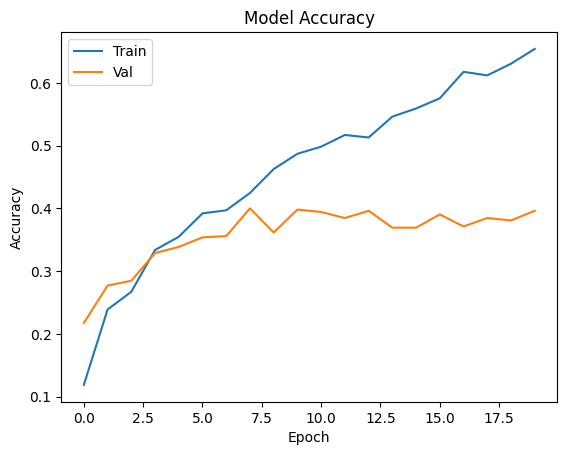

In [91]:
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

In [56]:
predictions = cnn.predict(testing_set, batch_size=1)

9/9 [==============================] - 2s 216ms/step


In [94]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [58]:
cm = confusion_matrix(test_classes, rounded_predictions)

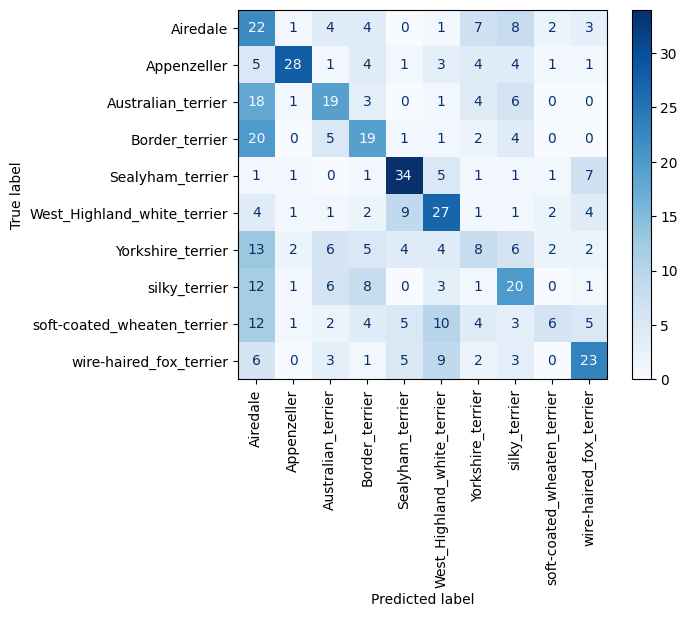

In [77]:
test_labels=list(test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)

In [90]:
pred_accuracy = (cm[0,0] + cm[1,1] + cm[2,2] + cm[3,3] + cm[4,4] + cm[5,5] + cm[6,6] + cm[7,7] + cm[8,8] + cm[9,9]) / len(test_classes) * 100

pred_accuracy

39.61538461538461

In [87]:
#try different number of filters
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [88]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
fit_model2 = cnn.fit(x=training_set, validation_data=testing_set, epochs=20)

Epoch 1/20
20/20 [==============================] - 17s 751ms/step - loss: 2.3960 - accuracy: 0.1364 - val_loss: 2.2768 - val_accuracy: 0.2058
Epoch 2/20
20/20 [==============================] - 14s 669ms/step - loss: 2.1762 - accuracy: 0.2354 - val_loss: 2.0699 - val_accuracy: 0.2615
Epoch 3/20
20/20 [==============================] - 14s 692ms/step - loss: 2.0154 - accuracy: 0.2752 - val_loss: 2.0149 - val_accuracy: 0.2865
Epoch 4/20
20/20 [==============================] - 20s 1s/step - loss: 1.8457 - accuracy: 0.3206 - val_loss: 1.8468 - val_accuracy: 0.3404
Epoch 5/20
20/20 [==============================] - 20s 975ms/step - loss: 1.8035 - accuracy: 0.3442 - val_loss: 1.8866 - val_accuracy: 0.3250
Epoch 6/20
20/20 [==============================] - 14s 667ms/step - loss: 1.6728 - accuracy: 0.3969 - val_loss: 1.9006 - val_accuracy: 0.3327
Epoch 7/20
20/20 [==============================] - 14s 712ms/step - loss: 1.6485 - accuracy: 0.4091 - val_loss: 1.8205 - val_accuracy: 0.3442
Ep

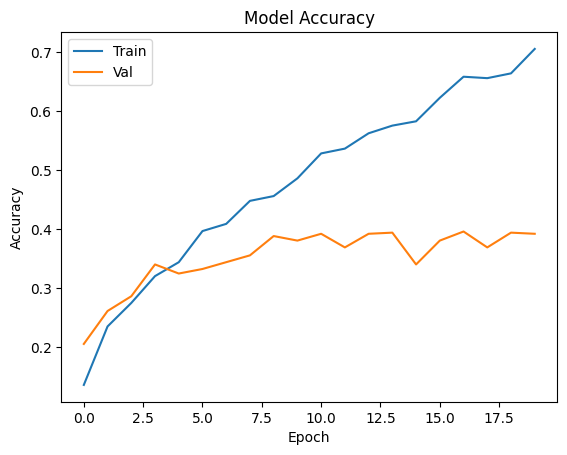

In [106]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

We got basically the same results.

In [95]:
predictions2 = cnn.predict(testing_set, batch_size=1)
rounded_predictions2 = np.argmax(predictions2, axis=-1)
cm2 = confusion_matrix(test_classes, rounded_predictions2)

9/9 [==============================] - 2s 216ms/step


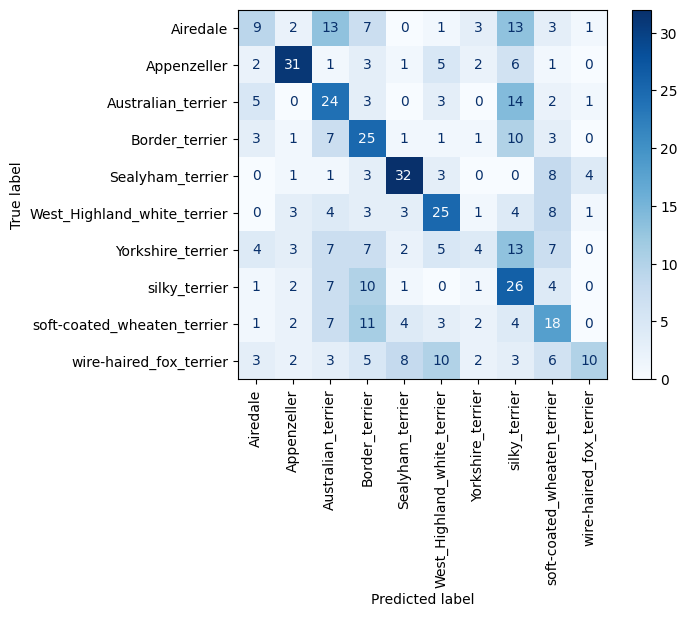

In [96]:
test_labels=list(test_labels)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=test_labels)
disp2.plot(cmap=plt.cm.Blues, xticks_rotation=90)

Trying the last model with batch_size 20 and with different architecture of the parameters. Besides that i'll try to use different data augmentations.

In [138]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [139]:
training_set = train_generator.flow_from_directory('../input/stanford2/train',
target_size=(64,64),
batch_size=20,
class_mode='categorical')


testing_set = test_generator.flow_from_directory('../input/stanford2/test',
shuffle=False,
target_size=(64,64),
batch_size=20,
class_mode='categorical')

Found 1232 images belonging to 10 classes.
Found 520 images belonging to 10 classes.


In [143]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 128)      

In [144]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [146]:
fit_model3 = cnn.fit(x=training_set, validation_data=testing_set, epochs=50, steps_per_epoch=61)

Epoch 1/50
61/61 [==============================] - 14s 225ms/step - loss: 1.7301 - accuracy: 0.3705 - val_loss: 1.8876 - val_accuracy: 0.3481
Epoch 2/50
61/61 [==============================] - 13s 204ms/step - loss: 1.6960 - accuracy: 0.3754 - val_loss: 1.8675 - val_accuracy: 0.3308
Epoch 3/50
61/61 [==============================] - 17s 280ms/step - loss: 1.6544 - accuracy: 0.4117 - val_loss: 1.7718 - val_accuracy: 0.3654
Epoch 4/50
61/61 [==============================] - 17s 287ms/step - loss: 1.6531 - accuracy: 0.4076 - val_loss: 1.7641 - val_accuracy: 0.3885
Epoch 5/50
61/61 [==============================] - 15s 243ms/step - loss: 1.5982 - accuracy: 0.4290 - val_loss: 1.9681 - val_accuracy: 0.3519
Epoch 6/50
61/61 [==============================] - 15s 244ms/step - loss: 1.6274 - accuracy: 0.4274 - val_loss: 1.9513 - val_accuracy: 0.3231
Epoch 7/50
61/61 [==============================] - 14s 231ms/step - loss: 1.5942 - accuracy: 0.4150 - val_loss: 1.7028 - val_accuracy: 0.3923

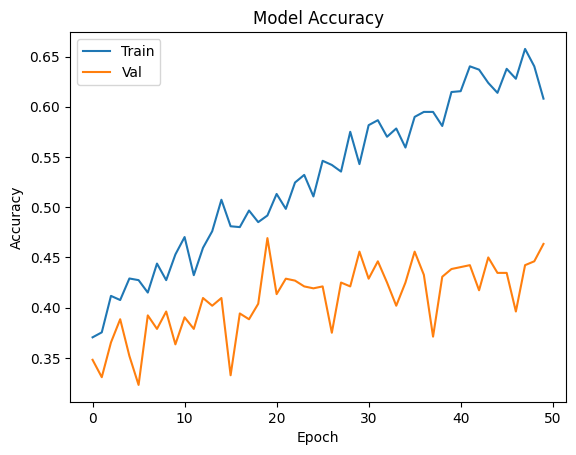

In [147]:
plt.plot(fit_model3.history['accuracy'])
plt.plot(fit_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

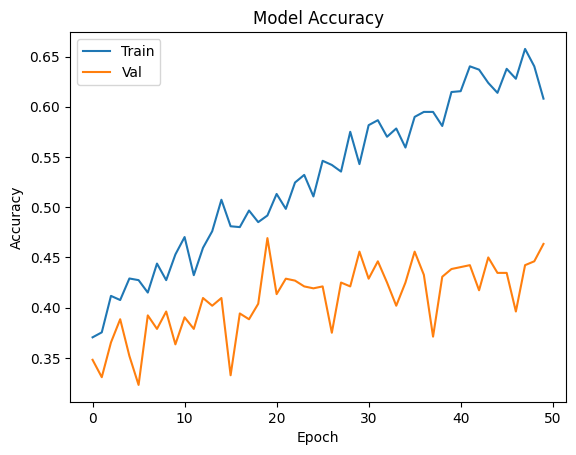

In [148]:
plt.plot(fit_model3.history['accuracy'])
plt.plot(fit_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

Tha last model had almost the same results as the other two. Other simility is that maybe the training model was going to a path of overfitting, and with that, the training accuracy and the validadion set wasn't growing in the same way.

In [149]:
predictions3 = cnn.predict(testing_set, batch_size=1)
rounded_predictions3 = np.argmax(predictions3, axis=-1)
cm3 = confusion_matrix(test_classes, rounded_predictions3)

26/26 [==============================] - 4s 143ms/step


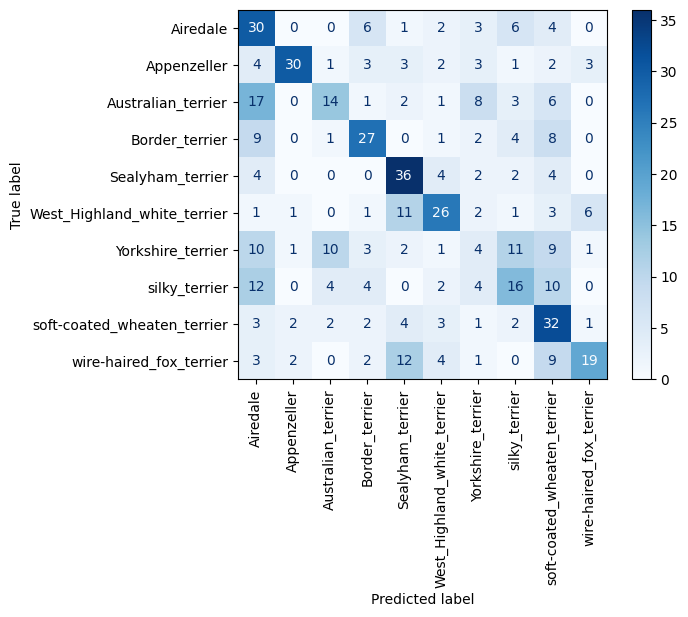

In [152]:
test_labels=list(test_labels)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=test_labels)
disp3.plot(cmap=plt.cm.Blues, xticks_rotation=90)

In [153]:
pred_accuracy3 = (cm3[0,0] + cm3[1,1] + cm3[2,2] + cm3[3,3] + cm3[4,4] + cm3[5,5] + cm3[6,6] + cm3[7,7] + cm3[8,8] + cm3[9,9]) / len(test_classes) * 100

pred_accuracy3 

45.0

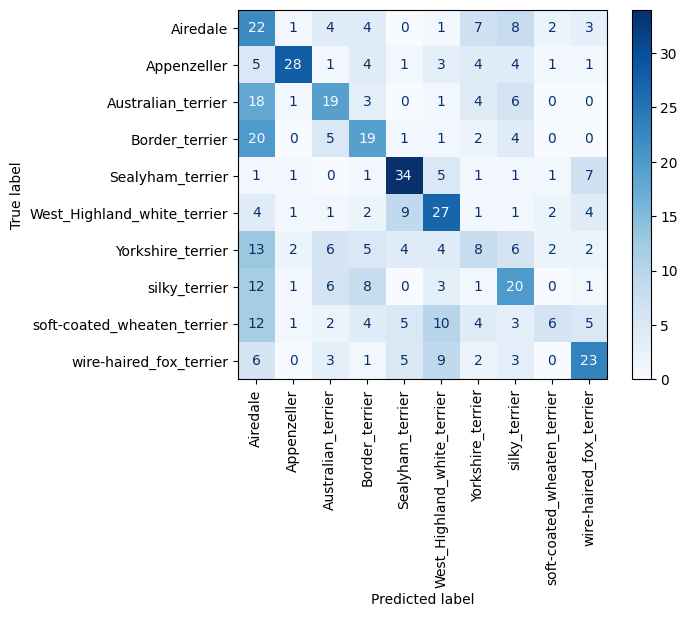

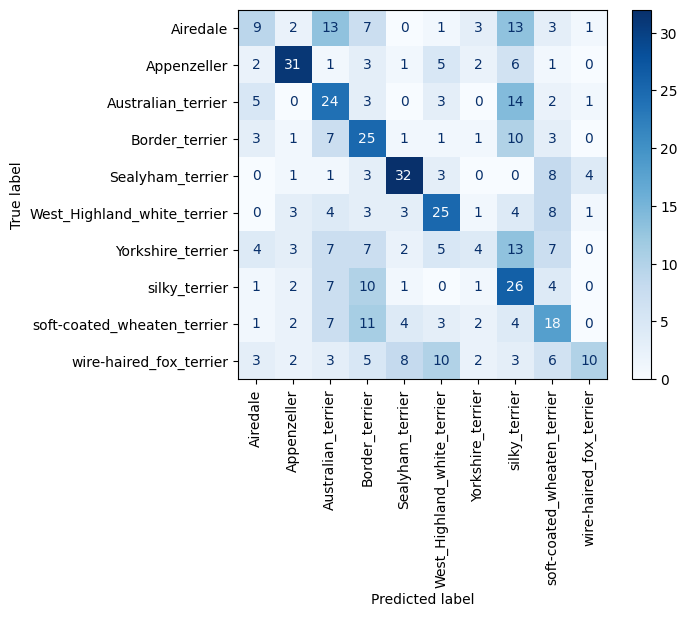

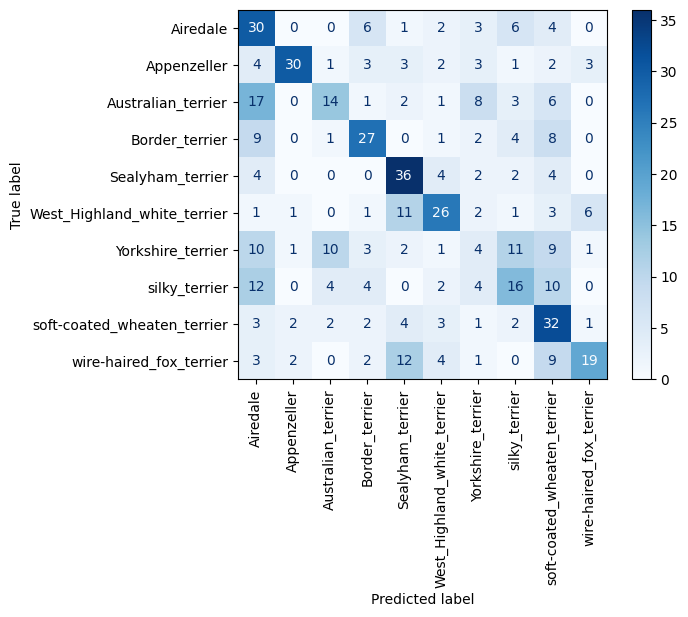

In [159]:
#sub1 = disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
#sub2 = disp2.plot(cmap=plt.cm.Blues, xticks_rotation=90)
#sub3 = disp3.plot(cmap=plt.cm.Blues, xticks_rotation=90)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
disp2.plot(cmap=plt.cm.Blues, xticks_rotation=90)
disp3.plot(cmap=plt.cm.Blues, xticks_rotation=90)